<a href="https://colab.research.google.com/github/YNWA-Algo/T-Cancer-Reoccurrence-Predictor-Model/blob/main/TCancer_R_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Borzooei,Shiva and Tarokhian,Aidin. (2023). Differentiated Thyroid Cancer Recurrence. UCI Machine Learning Repository. https://doi.org/10.24432/C5632J

# Initiatlizing and importing required packages

In [130]:
# All Libraries required for this lab are listed below.
# !mamba install -qy pandas==1.3.3 numpy==1.21.2 ipywidgets==7.4.2 scipy==7.4.2 tqdm==4.62.3 matplotlib==3.5.0 seaborn==0.9.0


In [131]:
!pip install --upgrade scikit-learn

In [132]:
!pip uninstall scikit-learn -y
!pip install scikit-learn


Found existing installation: scikit-learn 1.5.0
Uninstalling scikit-learn-1.5.0:
  Successfully uninstalled scikit-learn-1.5.0
  Using cached scikit_learn-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [133]:
!pip install imblearn

In [134]:
import pandas as pd
import pylab as plt
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier

from matplotlib.pyplot import figure
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, LabelBinarizer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
#from imblearn.utils import _validation

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from collections import Counter

In [135]:
import warnings
warnings.filterwarnings('ignore')

Get/Fetch data

In [136]:
import requests

# Data Fecthing & Cleansing, EDA, PreProcessing

In [137]:
# Define data source url (credits given above - line 1)
url = 'https://archive.ics.uci.edu/static/public/915/data.csv'

# Fetch and load the data into a DataFrame
data_df = pd.read_csv(url)

# Display the first few rows of the DataFrame
data_df.head(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [138]:
data_df.shape
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [139]:
data_df['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

In [140]:
data_df.describe(include = 'object')

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275


In [141]:
data_df['Gender'].value_counts()

Gender
F    312
M     71
Name: count, dtype: int64

In [142]:
data_df['M'].value_counts()

M
M0    365
M1     18
Name: count, dtype: int64

In [143]:
data_df['N'].value_counts()

N
N0     268
N1b     93
N1a     22
Name: count, dtype: int64

In [144]:
data_df['T'].value_counts()

T
T2     151
T3a     96
T1a     49
T1b     43
T4a     20
T3b     16
T4b      8
Name: count, dtype: int64

In [145]:
data_df['Stage'].value_counts()

Stage
I      333
II      32
IVB     11
III      4
IVA      3
Name: count, dtype: int64

In [146]:
data_df['Risk'].value_counts()

Risk
Low             249
Intermediate    102
High             32
Name: count, dtype: int64

In [147]:
data_df['Focality'].value_counts()

Focality
Uni-Focal      247
Multi-Focal    136
Name: count, dtype: int64

In [148]:
data_df['Adenopathy'].value_counts()

Adenopathy
No           277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: count, dtype: int64

In [149]:
data_df['Response'].value_counts()

Response
Excellent                 208
Structural Incomplete      91
Indeterminate              61
Biochemical Incomplete     23
Name: count, dtype: int64

In [150]:
data_df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


<Axes: xlabel='Recurred'>

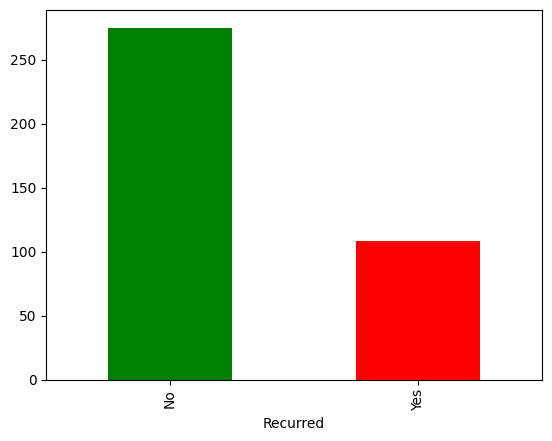

In [151]:
# Visualize the count for each outcome whether the cancer reoocurred or not
data_df['Recurred'].value_counts().plot.bar(color=['green', 'red'])

<Axes: xlabel='Physical Examination'>

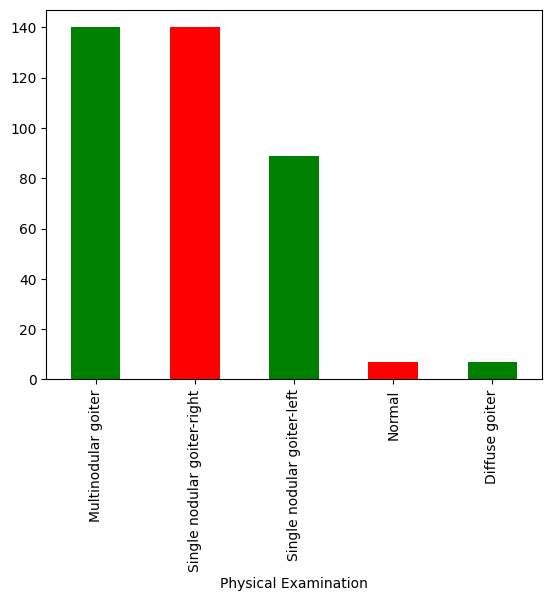

In [152]:
# Visualize the count for Physical Examination
data_df['Physical Examination'].value_counts().plot.bar(color=['green', 'red'])

<Axes: xlabel='Thyroid Function'>

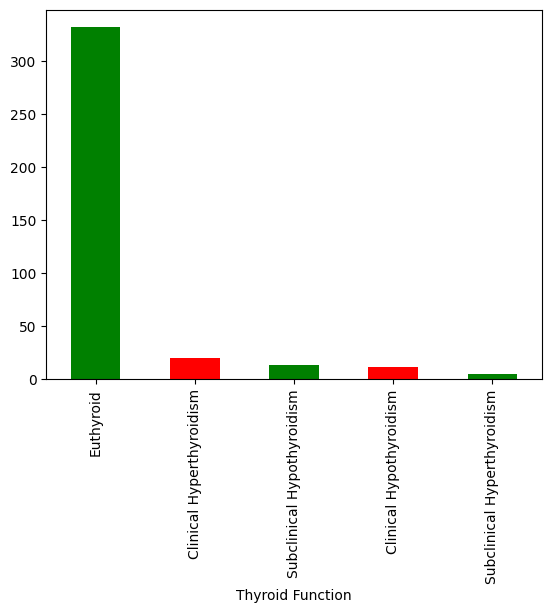

In [153]:
# Visualize the count for Thyroid Function
data_df['Thyroid Function'].value_counts().plot.bar(color=['green', 'red'])

<Axes: xlabel='Pathology'>

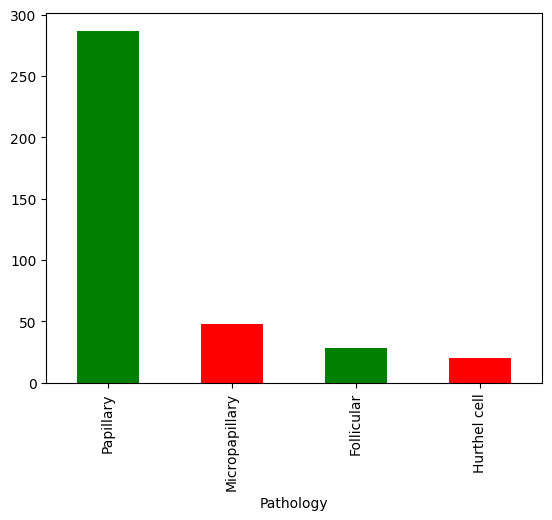

In [154]:
# Visualize the count for pathology
data_df['Pathology'].value_counts().plot.bar(color=['green', 'red'])

In [155]:
# seperate the features i.e X (columns) data by variable types to prep for feature engineering
Ordinal_vars = ['Risk', 'Stage','T', 'N','Response']

In [156]:
Binary_vars = ['Gender', 'M', 'Recurred', 'Smoking', 'Hx Smoking','Hx Radiothreapy', 'Focality']

In [157]:
Categorical_vars = ['Physical Examination', 'Thyroid Function', 'Pathology', 'Adenopathy']

In [158]:
Numerical_vars = ['Age']

#Featuring Engineering, Encoding, Scaling

In [159]:
lb, le, ord, ohe = LabelBinarizer(), LabelEncoder(), OrdinalEncoder(), OneHotEncoder()

In [160]:
for column in Binary_vars:
  data_df[column] = lb.fit_transform(data_df[column])

In [161]:

Risk = ['Low', 'Intermediate', 'High']
Stage = ['I', 'II', 'III', 'IVA', 'IVB']
T = ['T1a','T1b','T2','T3a', 'T3b', 'T4a', 'T4b']
N = ['N0','N1a', 'N1b']
Response = ['Excellent', 'Structural Incomplete','Biochemical Incomplete', 'Indeterminate']

In [162]:
for column in Ordinal_vars:
  data_df[column] = pd.DataFrame(ord.fit_transform(data_df[[column]]))


In [163]:
data_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,1,2.0,0.0,0.0,0,0.0,2.0,0
1,34,0,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,1,2.0,0.0,0.0,0,0.0,1.0,0
2,30,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,2.0,0.0,0.0,0,0.0,1.0,0
3,62,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,2.0,0.0,0.0,0,0.0,1.0,0
4,62,0,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,0,2.0,0.0,0.0,0,0.0,1.0,0


In [164]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   383 non-null    int64  
 1   Gender                383 non-null    int64  
 2   Smoking               383 non-null    int64  
 3   Hx Smoking            383 non-null    int64  
 4   Hx Radiothreapy       383 non-null    int64  
 5   Thyroid Function      383 non-null    object 
 6   Physical Examination  383 non-null    object 
 7   Adenopathy            383 non-null    object 
 8   Pathology             383 non-null    object 
 9   Focality              383 non-null    int64  
 10  Risk                  383 non-null    float64
 11  T                     383 non-null    float64
 12  N                     383 non-null    float64
 13  M                     383 non-null    int64  
 14  Stage                 383 non-null    float64
 15  Response              3

In [165]:
data_df = pd.get_dummies(data_df, columns=Categorical_vars, drop_first=True, dtype=int)

In [166]:
data_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,T,N,M,...,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right
0,27,0,0,0,0,1,2.0,0.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
1,34,0,0,1,0,1,2.0,0.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
2,30,0,0,0,0,1,2.0,0.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
3,62,0,0,0,0,1,2.0,0.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
4,62,0,0,0,0,0,2.0,0.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0


In [167]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 29 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Age                                               383 non-null    int64  
 1   Gender                                            383 non-null    int64  
 2   Smoking                                           383 non-null    int64  
 3   Hx Smoking                                        383 non-null    int64  
 4   Hx Radiothreapy                                   383 non-null    int64  
 5   Focality                                          383 non-null    int64  
 6   Risk                                              383 non-null    float64
 7   T                                                 383 non-null    float64
 8   N                                                 383 non-null    float64
 9   M                    

In [168]:
data_df.describe()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,T,N,M,...,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,...,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,40.866841,0.185379,0.127937,0.073107,0.018277,0.644909,1.566580,2.206266,0.543081,0.046997,...,0.013055,0.036554,0.052219,0.125326,0.749347,0.018277,0.044386,0.723238,0.005222,0.125326
std,15.134494,0.389113,0.334457,0.260653,0.134126,0.479167,0.643233,1.344667,0.857732,0.211910,...,0.113658,0.187908,0.222760,0.331522,0.433956,0.134126,0.206221,0.447983,0.072168,0.331522
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,6.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [169]:
#scaling ordinal and numeric data because as you can see from the above.describe review, values are on different scales

In [170]:
MM = MinMaxScaler()
for column in Ordinal_vars + Numerical_vars: #interate over individual column names
  data_df[column] = MM.fit_transform(data_df[[column]])

In [171]:
data_df.describe()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,T,N,M,...,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,...,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,0.386072,0.185379,0.127937,0.073107,0.018277,0.644909,0.783290,0.367711,0.271540,0.046997,...,0.013055,0.036554,0.052219,0.125326,0.749347,0.018277,0.044386,0.723238,0.005222,0.125326
std,0.225888,0.389113,0.334457,0.260653,0.134126,0.479167,0.321617,0.224111,0.428866,0.211910,...,0.113658,0.187908,0.222760,0.331522,0.433956,0.134126,0.206221,0.447983,0.072168,0.331522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.208955,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.328358,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.537313,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [172]:
#saving a copy of the processed data for later use
data_df.to_csv('processed_data.csv')

# Data Splitting - Training/Testing Data Splits

In [173]:

# Define X (excluding 'Recurred' column)
X = data_df.drop(columns=['Recurred'])

# Define y (only 'Recurred' column)
y = data_df['Recurred']


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=123)
print ('Train set', X_train.shape,  y_train.shape)
print ('Test set', X_test.shape,  y_test.shape)


# Now you have X_train, X_test, y_train, and y_test

Train set (268, 28) (268,)
Test set (115, 28) (115,)


In [174]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Recurred, dtype: int64

In [175]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state= 123)
print ('Train set', X_train.shape,  y_train.shape)
print ('Test set', X_test.shape,  y_test.shape)


Train set (268, 28) (268,)
Test set (115, 28) (115,)


In [176]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (268, 28) (268,)
Test set: (115, 28) (115,)


# Models

Logistic Regression Model

In [177]:
# Build a simple logistic regression model
Lmodel = LogisticRegression(random_state=123,
                              max_iter = 1100)

# Train the model
Lmodel.fit(X_train, y_train)
preds = Lmodel.predict(X_test)

In [178]:
accuracy_score(y_test, preds)

0.8956521739130435

In [179]:
recall_score(y_test, preds)

0.6785714285714286

In [180]:

# Calculate accuracy
accuracy = accuracy_score(y_test, preds)

# Calculate precision
precision = precision_score(y_test, preds)

# Calculate recall
recall = recall_score(y_test, preds)

# Calculate F1-score
f1 = f1_score(y_test, preds)

# Calculate AUC (ROC AUC)
auc = roc_auc_score(y_test, preds)

In [181]:
# Create a DataFrame to organize the metrics
Lmetrics_df = pd.DataFrame({
    'L.Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC (ROC AUC)'],
    'Value': [accuracy, precision, recall, f1, auc]
})

# Print the metrics table
Lmetrics_df

,L.Metric,Value
0,Accuracy,0.895652
1,Precision,0.863636
2,Recall,0.678571
3,F1-score,0.760000
4,AUC (ROC AUC),0.822044


In [182]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[84  3]
 [ 9 19]]


KNN Model

In [183]:
# Trying different K - values from 1 to 50
max_k = 50
# Create an empty list to store f1score for each k
f1_scores = []

In [184]:
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train, y_train.values.ravel())
    preds = knn.predict(X_test)
    # Evaluate the classifier with f1score
    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.7692
2,0.6957
3,0.7547
4,0.7059
5,0.7170
6,0.7500
7,0.7037
8,0.7037
9,0.7143


Text(0.5, 1.0, 'KNN F1 Score')

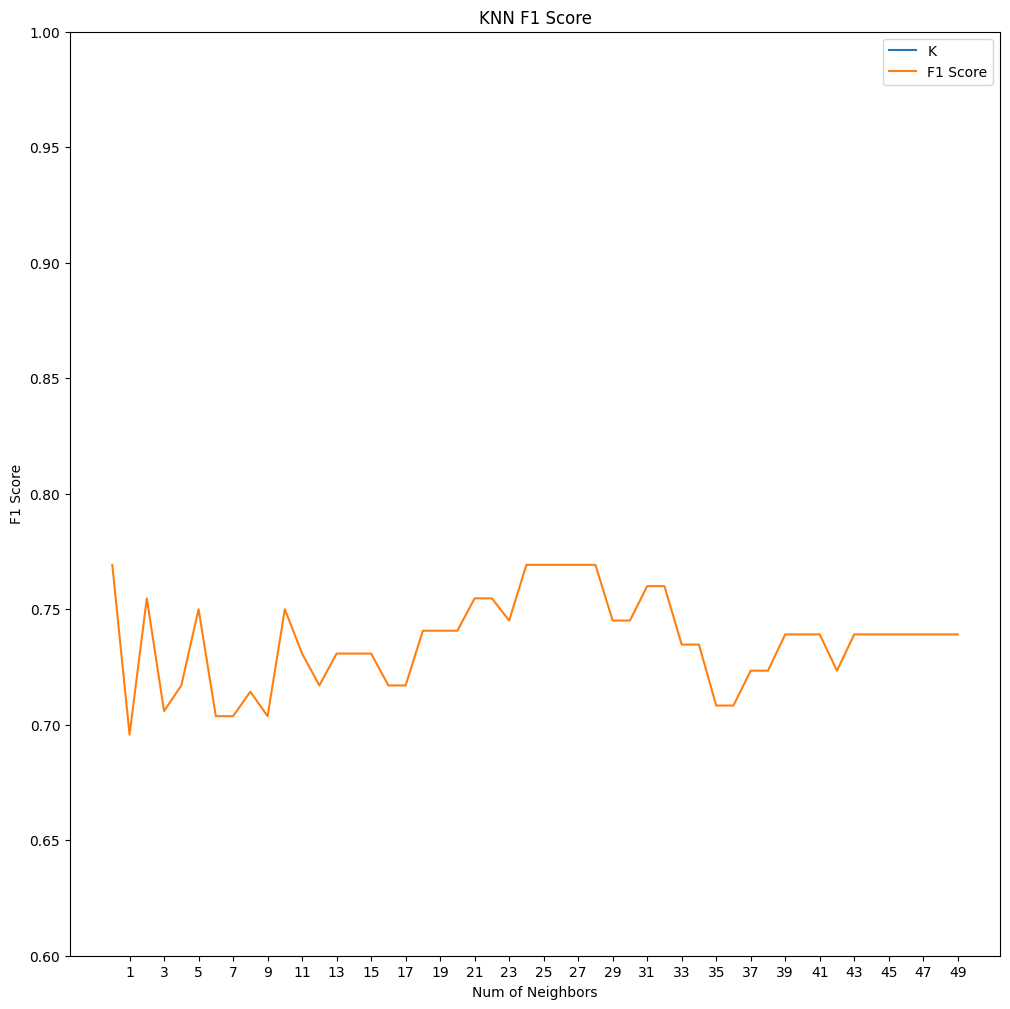

In [185]:
# Plot F1 results
ax = f1_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.6, 1))
plt.title('KNN F1 Score')

In [186]:
# As we can see from the F1 score linechart, the best K value is 1 with about 0.7602 f1score.

In [187]:
# Define a KNN classifier with `n_neighbors=1`
knn_model = KNeighborsClassifier(n_neighbors=1)

# Train the model
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [188]:
# Make predictions
kpreds = knn_model.predict(X_test)

In [189]:
# Calculate accuracy
accuracy = accuracy_score(y_test, kpreds)

# Calculate precision
precision = precision_score(y_test,kpreds)

# Calculate recall
recall = recall_score(y_test, kpreds)

# Calculate F1-score
f1 = f1_score(y_test, kpreds)

# Calculate AUC (ROC AUC)
auc = roc_auc_score(y_test, kpreds)

In [190]:
# Create a DataFrame to organize the metrics
Kmetrics_df = pd.DataFrame({
    'K.Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC (ROC AUC)'],
    'Value': [accuracy, precision, recall, f1, auc]
})

# Print the metrics table
Kmetrics_df

,K.Metric,Value
0,Accuracy,0.895652
1,Precision,0.833333
2,Recall,0.714286
3,F1-score,0.769231
4,AUC (ROC AUC),0.834154


Decision Tree - Bagging

In [191]:
from sklearn.utils import resample

In [192]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
#searching odd numbers from 1 to 39 for n_estimators and odd numbers from 1 to 20 for max_depth in the base_estimator
#param_grid = {'n_estimators': [2*n+1 for n in range(20)],
     #'base_estimator__max_depth' : [2*n+1 for n in range(10) ] }

In [195]:

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}


In [196]:
#Create a BaggingClassifier object called Bag with the base_estimator set to a DecisionTreeClassifier object where random_state = 0 and bootstrap = True
bagging_clf = BaggingClassifier(estimator = DecisionTreeClassifier(), random_state=0, bootstrap=True)

In [197]:
#create a GridSearchCV object and search for the best parameters according to our parameter_grid
search = GridSearchCV(estimator=bagging_clf, param_grid=param_grid, scoring='accuracy', cv=5)

In [198]:
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=0),
             param_grid={'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [199]:
#Print the best parameters
print("Best parameters found: ", search.best_params_)

#Evaluate Model
score = search.score(X_test, y_test)
print("Score: ", score)

Best parameters found:  {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 10}
Score:  0.9478260869565217


In [200]:
# Create a BaggingClassifier with the best parameters
best_n_estimators = search.best_params_['n_estimators']
best_max_samples = search.best_params_['max_samples']
best_max_features = search.best_params_['max_features']

bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # Use a decision tree as the base estimator
    n_estimators=best_n_estimators,
    max_samples=best_max_samples,
    max_features=best_max_features,
    random_state=0,  # Set your desired random state
    bootstrap=True  # You can adjust other hyperparameters as needed
)

# Fit the model to your training data
bagging_clf.fit(X_train, y_train)

# Make predictions on your test data
y_pred = bagging_clf.predict(X_test)


In [201]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test,y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate AUC (ROC AUC)
auc = roc_auc_score(y_test, y_pred)

In [202]:
# Create a DataFrame to organize the metrics
Bagmetrics_df = pd.DataFrame({
    'Bag.Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC (ROC AUC)'],
    'Value': [accuracy, precision, recall, f1, auc]
})

# Print the metrics table
Bagmetrics_df

,Bag.Metric,Value
0,Accuracy,0.947826
1,Precision,1.000000
2,Recall,0.785714
3,F1-score,0.880000
4,AUC (ROC AUC),0.892857


# Model Interpretation

In [203]:
!pip install lime

In [204]:
from lime.lime_tabular import LimeTabularExplainer
from sklearn.inspection import PartialDependenceDisplay

In [205]:
from math import perm

feature_importance = permutation_importance(bagging_clf, X_test, y_test, n_repeats=12, random_state=0, n_jobs=-1)

In [206]:
feature_importance.importances.shape

(28, 12)

In [207]:
def visualize_feature_importance(importance_array):
    # Sort the array based on mean value
    sorted_idx = importance_array.importances_mean.argsort()
    # Visualize the feature importances using boxplot
    fig, ax = plt.subplots()
    fig.set_figwidth(16)
    fig.set_figheight(10)
    fig.tight_layout()
    ax.boxplot(importance_array.importances[sorted_idx].T,
               vert=False, labels=X_train.columns[sorted_idx])
    ax.set_title("Permutation Importances (train set)")
    plt.show()

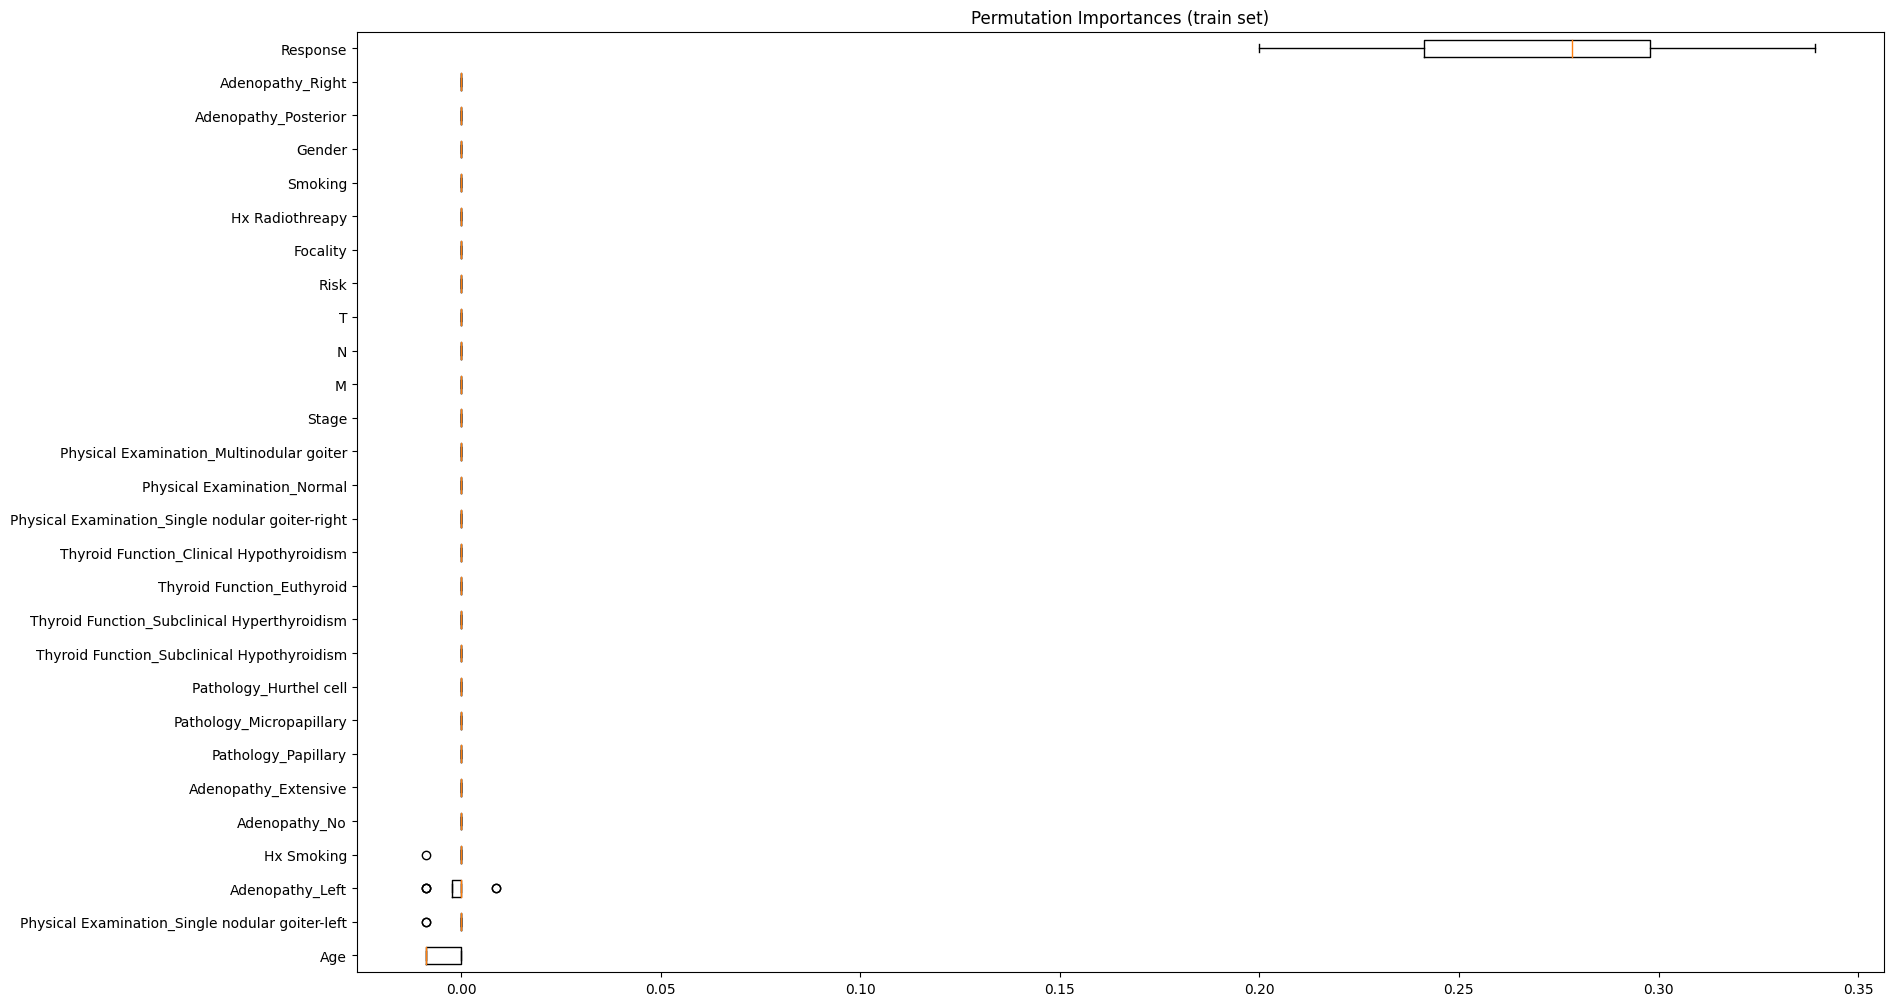

In [208]:
visualize_feature_importance(feature_importance)

In [213]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    estimator =bagging_clf,
    X=X_train,
    y=y_train,
    scoring ='accuracy',
    n_repeats=50,
    random_state=0,
)


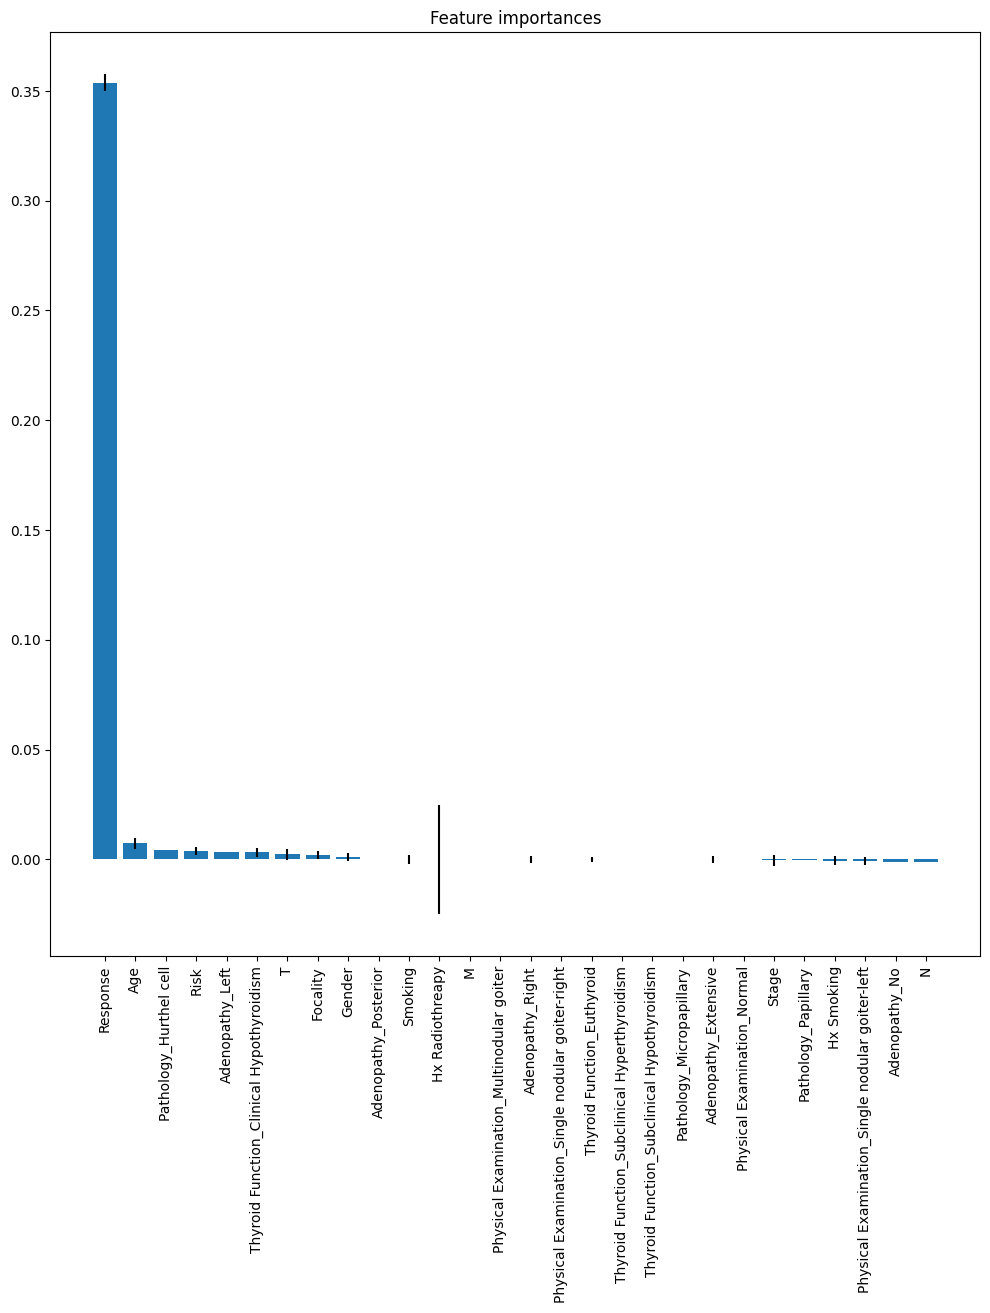

In [217]:
indices = np.argsort(result.importances_mean)[::-1]

plt.figure(figsize=(12, 12))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), result.importances_mean[indices],
        yerr=result['importances_std']
)
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

In [221]:
# result: The result of feature importance calculation
# X_train: Your feature matrix (dataframe)

# Sort the indices based on importances_mean
indices = np.argsort(result.importances_mean)[::-1]

# Create a dataframe with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns[indices],
    'Importance': result.importances_mean[indices],
    'Importance Std': result['importances_std'][indices]
})

# Display the dataframe
feature_importance_df.head(30)

,Feature,Importance,Importance Std
0,Response,0.353731,0.024953
1,Age,0.007388,0.003913
2,Pathology_Hurthel cell,0.004104,0.001710
3,Risk,0.003806,0.002530
4,Adenopathy_Left,0.003433,0.002090
5,Thyroid Function_Clinical Hypothyroidism,0.003209,0.001295
6,T,0.002239,0.001828
7,Focality,0.001791,0.002008
8,Gender,0.000970,0.002565
9,Adenopathy_Posterior,0.000000,0.000000


# Model Templates for Reference

Logistic Regression Model

In [ ]:
rs = 123
# Build a logistic regression model
def build_lr(X_train, y_train, X_test, threshold=0.5, best_params=None):

    model = LogisticRegression(random_state=rs,
                              max_iter = 1000)
    # If best parameters are provided
    if best_params:
        model = LogisticRegression(penalty = 'l2',
                              random_state=rs,
                              max_iter = 1000,
                              class_weight=best_params['class_weight'])
    # Train the model
    model.fit(X_train, y_train)
    # If predicted probability is largr than threshold (default value is 0.5), generate a positive label
    predicted_proba = model.predict_proba(X_test)
    yp = (predicted_proba [:,1] >= threshold).astype('int')
    return yp, model

A method to define and train a Random Forest

In [ ]:
# A model to train a random Forest

def build_rf(X_train, y_train, X_test, threshold=0.5, best_params=None):

    model = RandomForestClassifier(random_state = rs)
    # If best parameters are provided
    if best_params:
        model = RandomForestClassifier(random_state = rs,
                                   # If bootstrap sampling is used
                                   bootstrap = best_params['bootstrap'],
                                   # Max depth of each tree
                                   max_depth = best_params['max_depth'],
                                   # Class weight parameters
                                   class_weight=best_params['class_weight'],
                                   # Number of trees
                                   n_estimators=best_params['n_estimators'],
                                   # Minimal samples to split
                                   min_samples_split=best_params['min_samples_split'])
    # Train the model
    model.fit(X_train, y_train)
    # If predicted probability is largr than threshold (default value is 0.5), generate a positive label
    predicted_proba = model.predict_proba(X_test)
    yp = (predicted_proba [:,1] >= threshold).astype('int')
    return yp, model

A method to evaluate a classifiers predictions

In [ ]:
rs = 123
def evaluate(yt, yp, eval_type="Original"):
    results_pos = {}
    results_pos['type'] = eval_type
    # Accuracy
    results_pos['accuracy'] = accuracy_score(yt, yp)
    # Precision, recall, Fscore
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, beta=5, pos_label=1, average='binary')
    results_pos['recall'] = recall
    # AUC
    results_pos['auc'] = roc_auc_score(yt, yp)
    # Precision
    results_pos['precision'] = precision
    # Fscore
    results_pos['fscore'] = f_beta
    return results_pos

A method to resample original data set

In [ ]:
def resample(X_train, y_train):
    # SMOTE sampler (Oversampling)
    smote_sampler = SMOTE(random_state = 123)
    # Undersampling
    under_sampler = RandomUnderSampler(random_state=123)
    # Resampled datasets
    X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
    X_under, y_under = under_sampler.fit_resample(X_train, y_train)
    return X_smo, y_smo, X_under, y_under

A method to visualize metrics

In [ ]:
def visualize_eval_metrics(results):
    df = pd.DataFrame(data=results)
    #table = pd.pivot_table(df, values='type', index=['accuracy', 'precision', 'recall', 'f1', 'auc'],
    #                columns=['type'])
    #df = df.set_index('type').transpose()
    print(df)
    x = np.arange(5)
    original = df.iloc[0, 1:].values
    class_weight = df.iloc[1, 1:].values
    smote = df.iloc[2, 1:].values
    under = df.iloc[3, 1:].values
    width = 0.2
    figure(figsize=(12, 10), dpi=80)
    plt.bar(x-0.2, original, width, color='#95a5a6')
    plt.bar(x, class_weight, width, color='#d35400')
    plt.bar(x+0.2, smote, width, color='#2980b9')
    plt.bar(x+0.4, under, width, color='#3498db')
    plt.xticks(x, ['Accuracy', 'Recall', 'AUC', 'Precision', 'Fscore'])
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Score")
    plt.legend(["Original", "Class Weight", "SMOTE", "Undersampling"])
    plt.show()